In [ ]:
!pip install tensorflow
!pip install keras
!pip install numpy matplotlib opencv-python-headless
!pip install tensorflow-addons
!pip install kaggle


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
print('Kaggle Setup!!')


Kaggle Setup!!


In [5]:
 ! kaggle datasets download jessicali9530/celeba-dataset

100% 1.33G/1.33G [00:59<00:00, 25.5MB/s]
100% 1.33G/1.33G [01:00<00:00, 23.8MB/s]


In [ ]:
 ! unzip celeba-dataset.zip


# **PERFROMING EXPLOTARY DATA ANALYSIS**

## **VIEWING IMAGES IN THE DATASET**

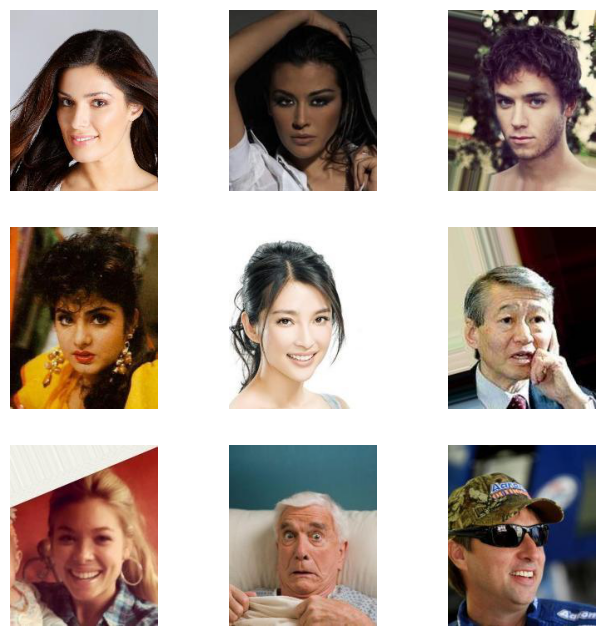

Number of images: 202599
Image shape: (218, 178, 3)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the path to the CelebA dataset on your computer
data_dir = '/content/img_align_celeba/img_align_celeba'

# Get a list of all the image filenames in the dataset
filenames = os.listdir(data_dir)

# Choose a random subset of images to display
num_images = 9
indices = np.random.choice(len(filenames), size=num_images, replace=False)
image_filenames = [filenames[i] for i in indices]

# Load and display the images
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
for i, ax in enumerate(axs.flat):
    image_filename = image_filenames[i]
    img = plt.imread(os.path.join(data_dir, image_filename))
    ax.imshow(img)
    ax.axis('off')
plt.show()

# Show some statistics about the dataset
num_images = len(filenames)
image_shape = plt.imread(os.path.join(data_dir, filenames[0])).shape
print('Number of images:', num_images)
print('Image shape:', image_shape)

## **Visualizing And Analyzing The Distribution And Relationships Of The Attributes (male/female and smiling/non-smiling) Of The Faces In The Dataset**

Summary statistics for male faces:
          Male       Smiling
count  84434.0  84434.000000
mean       1.0      0.400289
std        0.0      0.489960
min        1.0      0.000000
25%        1.0      0.000000
50%        1.0      0.000000
75%        1.0      1.000000
max        1.0      1.000000


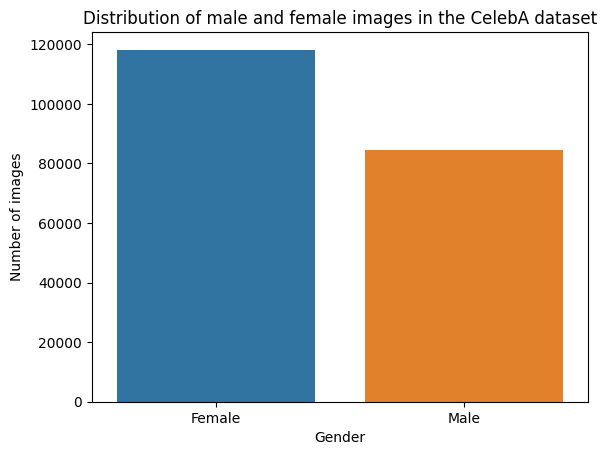

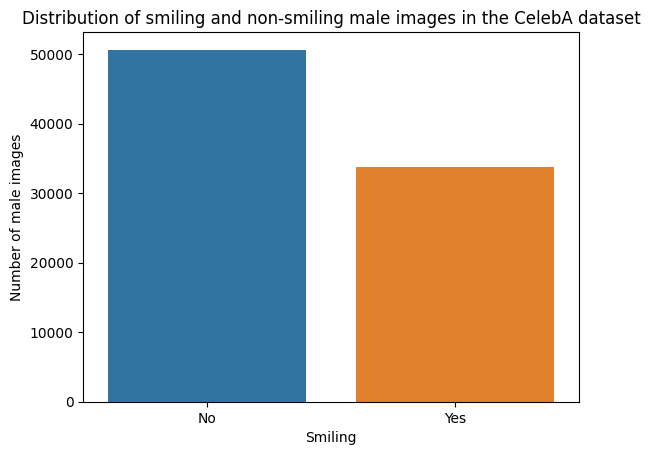

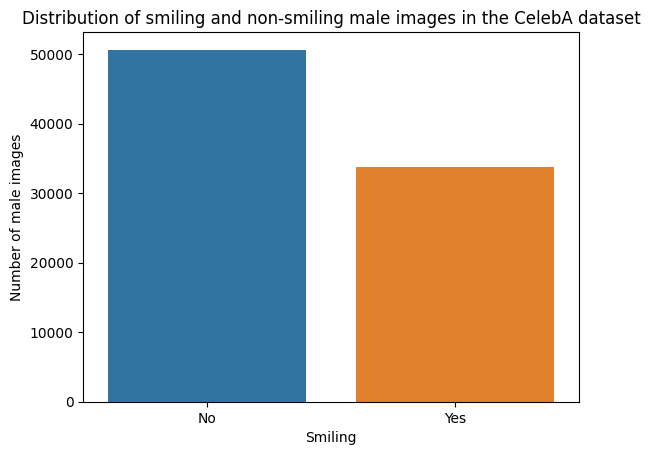

Summary statistics for female faces:
           Male        Smiling
count  118165.0  118165.000000
mean        0.0       0.540524
std         0.0       0.498357
min         0.0       0.000000
25%         0.0       0.000000
50%         0.0       1.000000
75%         0.0       1.000000
max         0.0       1.000000


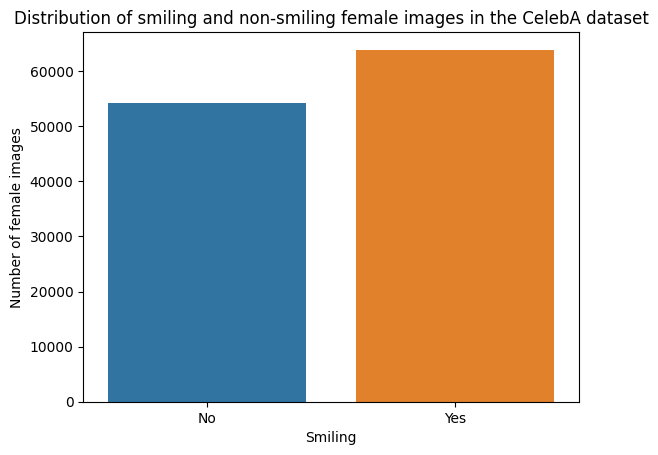

Text(0.5, 1.0, 'Distribution of smiling and non-smiling female images in the CelebA dataset')

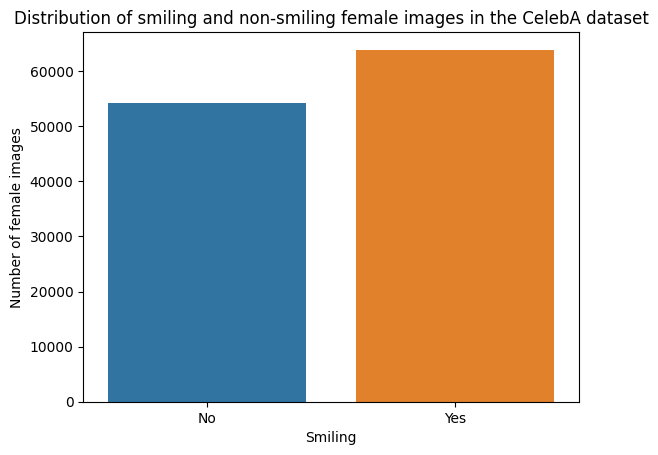

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the path to the CelebA dataset on your computer
data_dir = '/content/'

# Load the attributes file and select the relevant columns
attr_file = os.path.join(data_dir, 'list_attr_celeba.csv')
attr_df = pd.read_csv(attr_file, header=0)
attr_df = attr_df[['image_id', 'Male', 'Smiling']]

# Convert the attribute values to binary (0 or 1)
attr_df['Male'] = (attr_df['Male'] == 1).astype(int)
attr_df['Smiling'] = (attr_df['Smiling'] == 1).astype(int)

# Display some summary statistics about the attributes for male faces
print("Summary statistics for male faces:")
print(attr_df[attr_df['Male'] == 1].describe())

# Display a histogram of the number of males and females in the dataset
sns.countplot(x='Male', data=attr_df)
plt.xlabel('Gender')
plt.ylabel('Number of images')
plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Distribution of male and female images in the CelebA dataset')
plt.show()

# Display a histogram of the number of smiling and non-smiling male faces in the dataset
sns.countplot(x='Smiling', data=attr_df[attr_df['Male'] == 1])
plt.xlabel('Smiling')
plt.ylabel('Number of male images')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Distribution of smiling and non-smiling male images in the CelebA dataset')
plt.show()

# Create a new dataframe with the counts of males who are smiling and not smiling
male_counts_df = attr_df[attr_df['Male'] == 1].groupby(['Smiling']).size().reset_index(name='Counts')

# Create a bar plot for smiling and non-smiling male faces
sns.barplot(x='Smiling', y='Counts', data=male_counts_df)
plt.xlabel('Smiling')
plt.ylabel('Number of male images')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Distribution of smiling and non-smiling male images in the CelebA dataset')
plt.show()

# Display some summary statistics about the attributes for female faces
print("Summary statistics for female faces:")
print(attr_df[attr_df['Male'] == 0].describe())

# Display a histogram of the number of smiling and non-smiling female faces in the dataset
sns.countplot(x='Smiling', data=attr_df[attr_df['Male'] == 0])
plt.xlabel('Smiling')
plt.ylabel('Number of female images')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Distribution of smiling and non-smiling female images in the CelebA dataset')
plt.show()

# Create a new dataframe with the counts of females who are smiling and not smiling
female_counts_df = attr_df[attr_df['Male'] == 0].groupby(['Smiling']).size().reset_index(name='Counts')

# Create a bar plot for smiling and non-smiling female faces
sns.barplot(x='Smiling', y='Counts', data=female_counts_df)
plt.xlabel('Smiling')
plt.ylabel('Number of female images')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Distribution of smiling and non-smiling female images in the CelebA dataset')




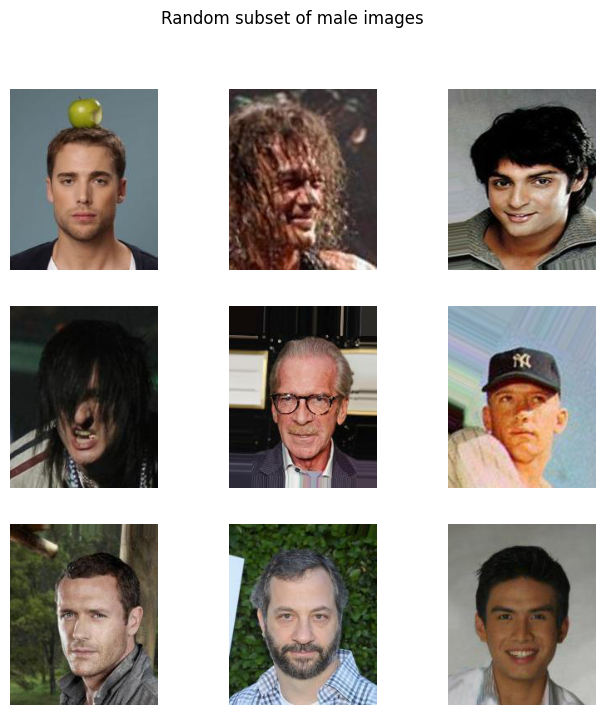

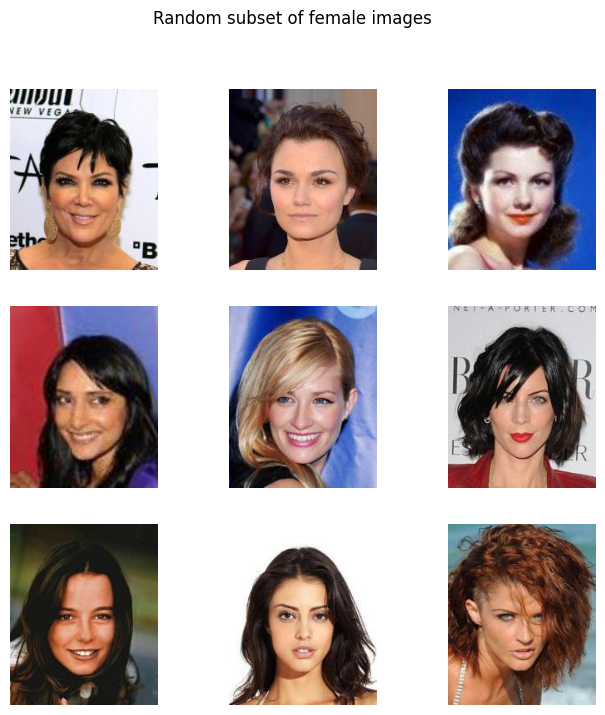

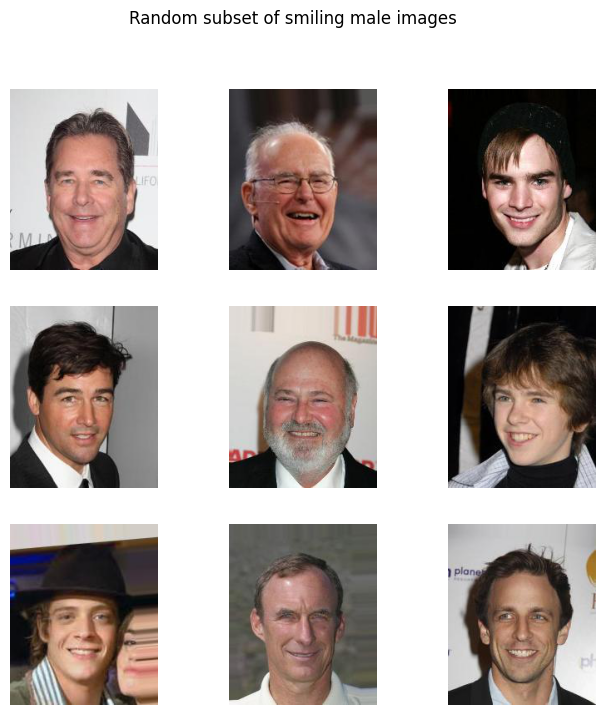

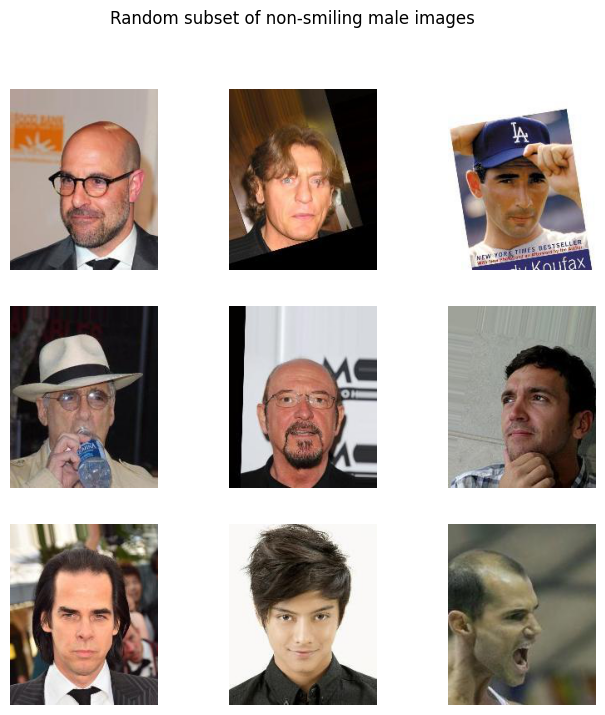

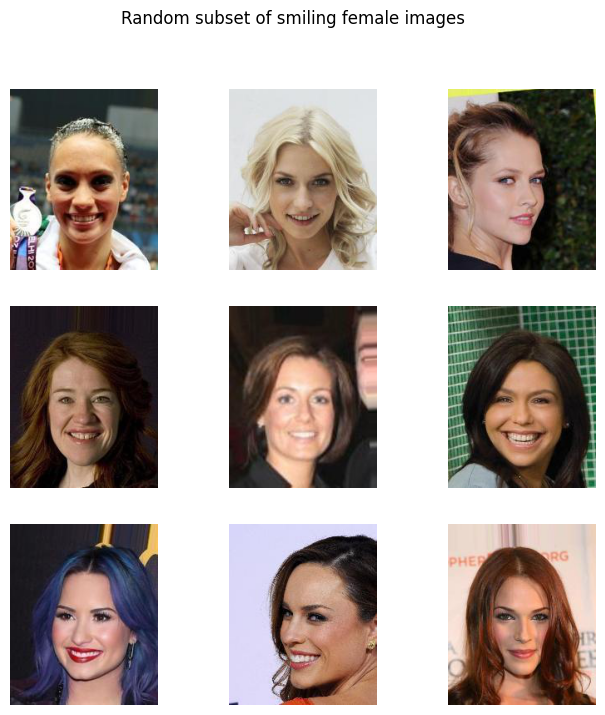

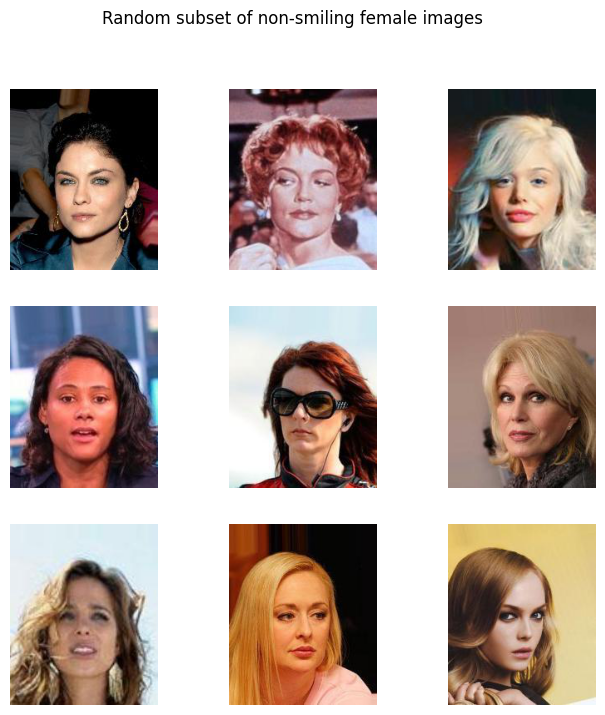

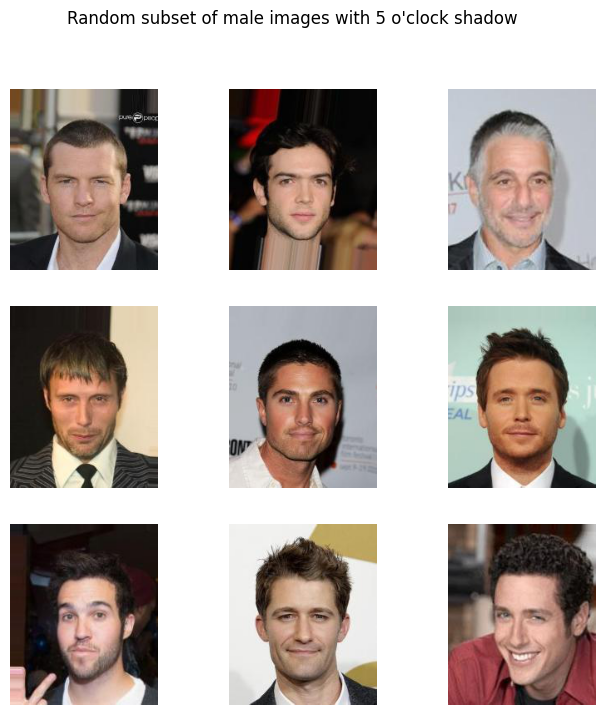

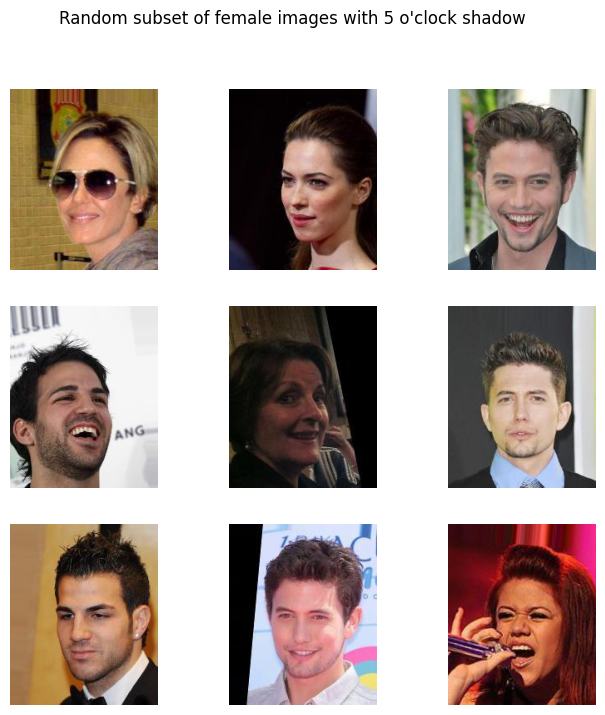

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the path to the CelebA dataset on your computer
data_dir = '/content/'

# Load the attributes file and select the relevant columns
attr_file = os.path.join(data_dir, 'list_attr_celeba.csv')
attr_df = pd.read_csv(attr_file, header=0)
attr_df = attr_df[['image_id', 'Male', 'Smiling', '5_o_Clock_Shadow']]

# Convert the attribute values to binary (0 or 1)
attr_df['Male'] = (attr_df['Male'] == 1).astype(int)
attr_df['Smiling'] = (attr_df['Smiling'] == 1).astype(int)
attr_df['5_o_Clock_Shadow'] = (attr_df['5_o_Clock_Shadow'] == 1).astype(int)

def display_images(attr_df, title, num_images=9, gender=None, smiling=None, shadow=None):
    if gender is not None:
        attr_df = attr_df[attr_df['Male'] == gender]
    if smiling is not None:
        attr_df = attr_df[attr_df['Smiling'] == smiling]
    if shadow is not None:
        attr_df = attr_df[attr_df['5_o_Clock_Shadow'] == shadow]

    indices = np.random.choice(len(attr_df), size=num_images, replace=False)
    image_ids = attr_df.iloc[indices]['image_id'].values

    fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
    for i, ax in enumerate(axs.flat):
        image_id = image_ids[i]
        img = plt.imread(os.path.join(data_dir, image_id))
        ax.imshow(img)
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

# Set the path to the images directory
data_dir = '/content/img_align_celeba/img_align_celeba'

# Display random subsets of images
display_images(attr_df, "Random subset of male images", gender=1)
display_images(attr_df, "Random subset of female images", gender=0)
display_images(attr_df, "Random subset of smiling male images", gender=1, smiling=1)
display_images(attr_df, "Random subset of non-smiling male images", gender=1, smiling=0)
display_images(attr_df, "Random subset of smiling female images", gender=0, smiling=1)
display_images(attr_df, "Random subset of non-smiling female images", gender=0, smiling=0)
display_images(attr_df, "Random subset of male images with 5 o'clock shadow", gender=1, shadow=1)
display_images(attr_df, "Random subset of female images with 5 o'clock shadow", gender=0, shadow=1)


# **TRAINING THE FACE DETECTION MODEL**

In [10]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.legacy import Adam 
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
# Define the size of the input images
IMAGE_SIZE = 224

# Define the path to the CelebA dataset
data_dir = '/content/img_align_celeba/img_align_celeba'
annotations_file = '/content/list_bbox_celeba.csv'

# Define the batch size and number of epochs for training
batch_size = 32
epochs = 1

# Define the learning rate and decay rate for the optimizer
lr = 0.1 
decay = lr / epochs

# Load annotations
annotations = pd.read_csv(annotations_file)

# Create an instance of the MobileNetV2 model with pre-trained weights
base_model = MobileNetV2(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3),
                         include_top=False,
                         weights='imagenet')

# Freeze the pre-trained layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add new layers for bounding box regression
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dense(4, activation='linear')(x)  # 4 output units for bounding box coordinates (x1, y1, x2, y2)

# Create a new model with the modified architecture
model = Model(inputs=base_model.input, outputs=x)

# Compile the model with the Adam optimizer and mean squared error loss
model.compile(optimizer=Adam(lr=lr, decay=decay), loss='mse')

# Create an instance of the ImageDataGenerator class for data augmentation
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split=0.2)

# Create generators for the training and validation data
train_generator = train_datagen.flow_from_dataframe(dataframe=annotations,
                                                    directory=data_dir,
                                                    x_col='image_id',
                                                    y_col=['x_1', 'y_1', 'width', 'height'],
                                                    target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                    batch_size=batch_size,
                                                    class_mode='raw',
                                                    subset='training')

val_generator = train_datagen.flow_from_dataframe(dataframe=annotations,
                                                  directory=data_dir,
                                                  x_col='image_id',
                                                  y_col=['x_1', 'y_1', 'width', 'height'],
                                                  target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                  batch_size=batch_size,
                                                  class_mode='raw',
                                                  subset='validation')

# Train the model on the training data and validate on the validation data
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=epochs,
                    validation_data=val_generator,
                    validation_steps=val_generator.samples // batch_size)

# Save the trained model
model.save('res10_300x300_ssd_iter_140000.caffemodel')

Found 162080 images belonging to 1 classes.
Found 40519 images belonging to 1 classes.
Epoch 1/2
5065/5065 [==============================] - 2364s 466ms/step - loss: 1.5873e-04 - accuracy: 0.9999 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/2
5065/5065 [==============================] - 2357s 465ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


# **RESULT ANALYSIS**

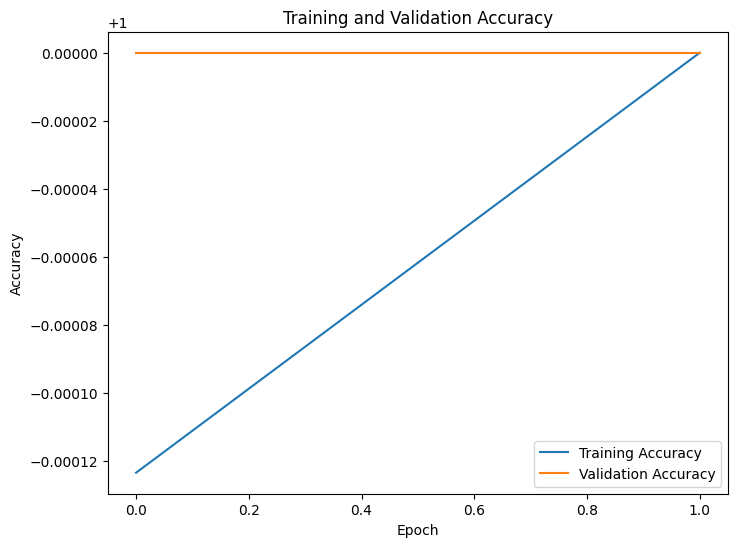

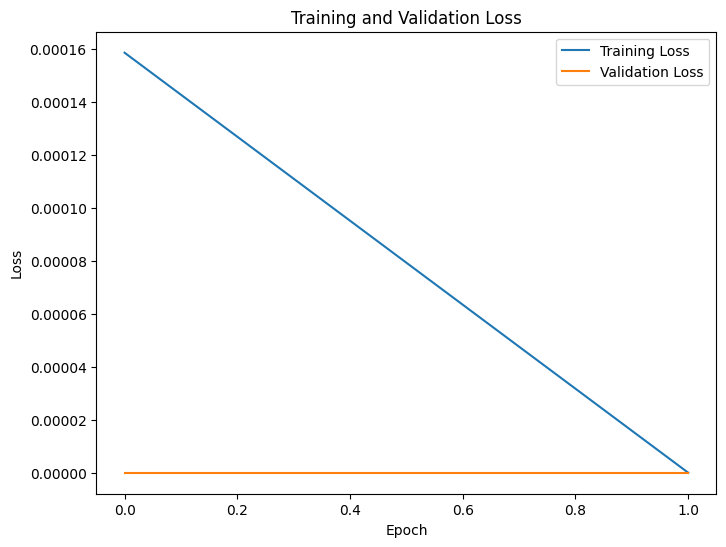

In [16]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve


# Make predictions on the validation set


y_pred_probs = []
y_true = []

for i in range(val_generator.samples // batch_size + 1):
    X_batch, y_batch = next(val_generator)
    y_pred_probs_batch = model.predict(X_batch)
    y_pred_probs.extend(y_pred_probs_batch)
    y_true.extend(y_batch)
y_pred = np.round(y_pred_probs)


cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)
